In [83]:
import pandas as pd

In [84]:
weather=pd.read_csv("/content/jabalpur_weather.csv",index_col="DATE")
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,IN011180800,"JABALPUR, IN",0.0,61,76.0,NaN
2000-01-02,IN011180800,"JABALPUR, IN",0.0,58,75.0,45.0
2000-01-03,IN011180800,"JABALPUR, IN",0.0,61,74.0,45.0
2000-01-04,IN011180800,"JABALPUR, IN",0.0,59,75.0,44.0
2000-01-05,IN011180800,"JABALPUR, IN",0.0,58,74.0,44.0
...,...,...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",NaN,64,76.0,55.0
2022-12-28,IN011180800,"JABALPUR, IN",NaN,64,76.0,49.0
2022-12-29,IN011180800,"JABALPUR, IN",NaN,66,79.0,46.0


In [85]:
null_pct = weather.apply(pd.isnull).sum()/w.shape[0]

In [86]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.731537
TAVG       0.000000
TMAX       0.318677
TMIN       0.372566
dtype: float64

In [87]:
weather.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP       5973
TAVG          0
TMAX       2602
TMIN       3042
dtype: int64

In [88]:
valid_columns = weather.columns[null_pct < .05]

In [89]:
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

In [90]:
weather=weather[valid_columns].copy()

In [91]:
weather.columns= weather.columns.str.lower()

In [92]:
weather

,station,name,tavg
DATE,,,
2000-01-01,IN011180800,"JABALPUR, IN",61
2000-01-02,IN011180800,"JABALPUR, IN",58
2000-01-03,IN011180800,"JABALPUR, IN",61
2000-01-04,IN011180800,"JABALPUR, IN",59
2000-01-05,IN011180800,"JABALPUR, IN",58
...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64
2022-12-28,IN011180800,"JABALPUR, IN",64
2022-12-29,IN011180800,"JABALPUR, IN",66


In [93]:
weather = weather.ffill()

In [94]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [95]:
weather.dtypes

station    object
name       object
tavg        int64
dtype: object

In [96]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='DATE', length=8165)

In [97]:
weather.index = pd.to_datetime(w.index)

In [98]:
weather.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=8165)

In [99]:
weather.index.year.value_counts().sort_index()

2000    291
2001    342
2002    344
2003    359
2004    363
2005    365
2006    365
2007    361
2008    363
2009    364
2010    360
2011    360
2012    366
2013    365
2014    365
2015    365
2016    361
2017    361
2018    363
2019    352
2020    321
2021    355
2022    354
Name: DATE, dtype: int64

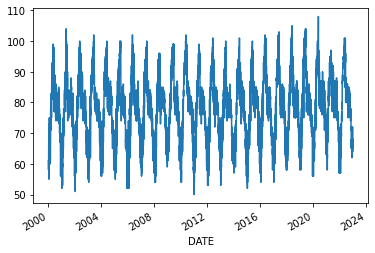

In [100]:
weather["tavg"].plot()

In [101]:
weather

,station,name,tavg
DATE,,,
2000-01-01,IN011180800,"JABALPUR, IN",61
2000-01-02,IN011180800,"JABALPUR, IN",58
2000-01-03,IN011180800,"JABALPUR, IN",61
2000-01-04,IN011180800,"JABALPUR, IN",59
2000-01-05,IN011180800,"JABALPUR, IN",58
...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64
2022-12-28,IN011180800,"JABALPUR, IN",64
2022-12-29,IN011180800,"JABALPUR, IN",66


In [102]:
weather["target"]=weather.shift(-1)['tavg']

In [103]:
weather

,station,name,tavg,target
DATE,,,,
2000-01-01,IN011180800,"JABALPUR, IN",61,58.0
2000-01-02,IN011180800,"JABALPUR, IN",58,61.0
2000-01-03,IN011180800,"JABALPUR, IN",61,59.0
2000-01-04,IN011180800,"JABALPUR, IN",59,58.0
2000-01-05,IN011180800,"JABALPUR, IN",58,60.0
...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64,64.0
2022-12-28,IN011180800,"JABALPUR, IN",64,66.0
2022-12-29,IN011180800,"JABALPUR, IN",66,67.0


In [104]:
weather = weather.ffill()
weather

,station,name,tavg,target
DATE,,,,
2000-01-01,IN011180800,"JABALPUR, IN",61,58.0
2000-01-02,IN011180800,"JABALPUR, IN",58,61.0
2000-01-03,IN011180800,"JABALPUR, IN",61,59.0
2000-01-04,IN011180800,"JABALPUR, IN",59,58.0
2000-01-05,IN011180800,"JABALPUR, IN",58,60.0
...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64,64.0
2022-12-28,IN011180800,"JABALPUR, IN",64,66.0
2022-12-29,IN011180800,"JABALPUR, IN",66,67.0


In [105]:
from sklearn.linear_model import Ridge

In [106]:
weather.corr()

,tavg,target
tavg,1.000000,0.963822
target,0.963822,1.000000


In [107]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)
rr

Ridge(alpha=0.1)

In [108]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [109]:
predictors

Index(['tavg'], dtype='object')

In [122]:
def backtest( weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined =  pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"]- combined["actual"]).abs()

        all_predictions.append(combined) 
    return pd.concat(all_predictions)


In [123]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2010-05-19,95.0,98.241054,3.241054
2010-05-20,94.0,94.385489,0.385489
2010-05-21,96.0,93.421598,2.578402
2010-05-22,97.0,95.349380,1.650620
2010-05-23,100.0,96.313272,3.686728
...,...,...,...
2022-12-27,64.0,64.518482,0.518482
2022-12-28,66.0,64.518482,1.481518
2022-12-29,67.0,66.445848,0.554152


In [125]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.0801740678261877

In [126]:
predictions["diff"].mean()

2.0801740678261877

In [128]:
def pct_diff(old, new): 
    return (new-old) / old

def compute_rolling (weather, horizon, col): 
    label=f"rolling_{horizon}_{col}"

    weather [label] = weather [col].rolling (horizon).mean() 
    weather [f"{label}_pct"] = pct_diff (weather[label], weather[col]) 
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons: 
  for col in ["tavg"]: 
      weather = compute_rolling(weather, horizon, col)

In [129]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_3_tavg_pct,rolling_14_tavg_pct
DATE,,,,,,,,,,
2000-01-01,IN011180800,"JABALPUR, IN",61,58.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,IN011180800,"JABALPUR, IN",58,61.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,IN011180800,"JABALPUR, IN",61,59.0,60.000000,0.016667,NaN,NaN,0.016667,NaN
2000-01-04,IN011180800,"JABALPUR, IN",59,58.0,59.333333,-0.005618,NaN,NaN,-0.005618,NaN
2000-01-05,IN011180800,"JABALPUR, IN",58,60.0,59.333333,-0.022472,NaN,NaN,-0.022472,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64,64.0,65.333333,-0.020408,67.857143,-0.056842,-0.020408,-0.056842
2022-12-28,IN011180800,"JABALPUR, IN",64,66.0,64.333333,-0.005181,67.357143,-0.049841,-0.005181,-0.049841
2022-12-29,IN011180800,"JABALPUR, IN",66,67.0,64.666667,0.020619,67.000000,-0.014925,0.020619,-0.014925


In [131]:
weather = weather.iloc[14:,:]
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_3_tavg_pct,rolling_14_tavg_pct
DATE,,,,,,,,,,
2000-01-29,IN011180800,"JABALPUR, IN",60,61.0,62.666667,-0.042553,64.285714,-0.066667,-0.042553,-0.066667
2000-01-30,IN011180800,"JABALPUR, IN",61,73.0,60.333333,0.011050,64.428571,-0.053215,0.011050,-0.053215
2000-01-31,IN011180800,"JABALPUR, IN",73,69.0,64.666667,0.128866,65.714286,0.110870,0.128866,0.110870
2000-02-01,IN011180800,"JABALPUR, IN",69,71.0,67.666667,0.019704,66.357143,0.039828,0.019704,0.039828
2000-02-02,IN011180800,"JABALPUR, IN",71,71.0,71.000000,0.000000,66.714286,0.064240,0.000000,0.064240
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64,64.0,65.333333,-0.020408,67.857143,-0.056842,-0.020408,-0.056842
2022-12-28,IN011180800,"JABALPUR, IN",64,66.0,64.333333,-0.005181,67.357143,-0.049841,-0.005181,-0.049841
2022-12-29,IN011180800,"JABALPUR, IN",66,67.0,64.666667,0.020619,67.000000,-0.014925,0.020619,-0.014925


In [132]:
weather = weather.fillna(0)

In [133]:
def expand_mean(df): 
  return df.expanding (1).mean()

for col in ["tavg"]:
    weather[f"month_avg_{col}"]=weather [col].groupby(weather.index.month, group_keys=False).apply(expand_mean) 
    weather[f"day_avg_{col}"] = weather [col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [134]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_3_tavg_pct,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,
2000-01-29,IN011180800,"JABALPUR, IN",60,61.0,62.666667,-0.042553,64.285714,-0.066667,-0.042553,-0.066667,60.000000,60.000000
2000-01-30,IN011180800,"JABALPUR, IN",61,73.0,60.333333,0.011050,64.428571,-0.053215,0.011050,-0.053215,60.500000,61.000000
2000-01-31,IN011180800,"JABALPUR, IN",73,69.0,64.666667,0.128866,65.714286,0.110870,0.128866,0.110870,64.666667,73.000000
2000-02-01,IN011180800,"JABALPUR, IN",69,71.0,67.666667,0.019704,66.357143,0.039828,0.019704,0.039828,69.000000,69.000000
2000-02-02,IN011180800,"JABALPUR, IN",71,71.0,71.000000,0.000000,66.714286,0.064240,0.000000,0.064240,70.000000,71.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,IN011180800,"JABALPUR, IN",64,64.0,65.333333,-0.020408,67.857143,-0.056842,-0.020408,-0.056842,64.732673,62.652174
2022-12-28,IN011180800,"JABALPUR, IN",64,66.0,64.333333,-0.005181,67.357143,-0.049841,-0.005181,-0.049841,64.731638,62.434783
2022-12-29,IN011180800,"JABALPUR, IN",66,67.0,64.666667,0.020619,67.000000,-0.014925,0.020619,-0.014925,64.733427,61.826087


In [135]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['tavg', 'rolling_3_tavg', ' rolling_3_tavg_pct', 'rolling_14_tavg',
       ' rolling_14_tavg_pct', 'rolling_3_tavg_pct', 'rolling_14_tavg_pct',
       'month_avg_tavg', 'day_avg_tavg'],
      dtype='object')

In [136]:
predictions =backtest(weather, rr ,predictors)
predictions

,actual,prediction,diff
DATE,,,
2010-06-16,84.0,84.448330,0.448330
2010-06-17,92.0,85.224358,6.775642
2010-06-18,94.0,91.355822,2.644178
2010-06-19,89.0,92.841286,3.841286
2010-06-20,85.0,88.985697,3.985697
...,...,...,...
2022-12-27,64.0,64.189827,0.189827
2022-12-28,66.0,64.231084,1.768916
2022-12-29,67.0,65.739312,1.260688


In [137]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

1.9961110023297035

In [138]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
2017-05-27,87.0,99.432396,12.432396
2019-04-12,82.0,93.496698,11.496698
2021-06-15,79.0,90.204889,11.204889
2020-06-02,79.0,89.512260,10.512260
2016-01-29,75.0,65.758909,9.241091
...,...,...,...
2015-12-08,67.0,66.998027,0.001973
2021-12-25,67.0,66.998657,0.001343
2015-09-29,81.0,81.000992,0.000992


In [139]:
 weather.loc["2000-03-07":"2015-07-03"]

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_3_tavg_pct,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,
2000-03-07,IN011180800,"JABALPUR, IN",77,73.0,77.000000,0.000000,71.428571,0.078000,0.000000,0.078000,77.400000,77.000000
2000-03-08,IN011180800,"JABALPUR, IN",73,71.0,75.333333,-0.030973,71.571429,0.019960,-0.030973,0.019960,76.666667,73.000000
2000-03-09,IN011180800,"JABALPUR, IN",71,74.0,73.666667,-0.036199,71.428571,-0.006000,-0.036199,-0.006000,75.857143,71.000000
2000-03-10,IN011180800,"JABALPUR, IN",74,82.0,72.666667,0.018349,72.357143,0.022705,0.018349,0.022705,75.625000,74.000000
2000-03-11,IN011180800,"JABALPUR, IN",82,81.0,75.666667,0.083700,73.785714,0.111326,0.083700,0.111326,76.333333,82.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-29,IN011180800,"JABALPUR, IN",82,84.0,82.666667,-0.008065,85.000000,-0.035294,-0.008065,-0.035294,88.291304,83.250000
2015-06-30,IN011180800,"JABALPUR, IN",84,81.0,82.666667,0.016129,84.714286,-0.008432,0.016129,-0.008432,88.281996,82.250000
2015-07-01,IN011180800,"JABALPUR, IN",81,83.0,82.333333,-0.016194,84.285714,-0.038983,-0.016194,-0.038983,81.114471,82.500000


In [140]:
predictions["diff"].round().value_counts()

1.0     1335
2.0      993
0.0      783
3.0      652
4.0      359
5.0      181
6.0      100
7.0       48
8.0       22
9.0       10
11.0       3
12.0       1
Name: diff, dtype: int64

In [141]:
predictions["diff"].round().value_counts().sort_index()

0.0      783
1.0     1335
2.0      993
3.0      652
4.0      359
5.0      181
6.0      100
7.0       48
8.0       22
9.0       10
11.0       3
12.0       1
Name: diff, dtype: int64

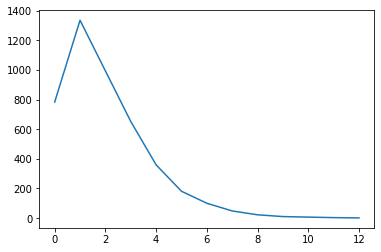

In [142]:
predictions["diff"].round().value_counts().sort_index().plot()